In [1]:
import numpy as np

In [2]:
class Particle:
    def __init__(self,pos,vel,eps,sigma):
        self.pos = np.array(pos)
        self.vel = np.array(vel)
        self.acc = np.zeros(len(pos))
        self.eps = eps
        self.sigma = sigma
        
    def distance(self,other):
        return np.linalg.norm(self.pos-other.pos, ord = 2)
    
    def update(self,dt):
        self.pos = (self.pos + dt*self.vel + 1/2*dt**2*self.acc)%1
        self.vel = self.vel + dt*self.acc
    
    def acceleration(self,other):
        if self.pos.all == other.pos.all:
            self.acc = np.zeros(len(self.pos))
        else:
            potential = 48*self.eps*(self.sigma**12/self.distance(other)**13-self.sigma**6/self.distance(other)**7)/self.distance(other)
            self.acc = potential*(self.pos-other.pos)

In [3]:
eps=10
sigma=2
particle = Particle([6,4],[0.3,0.4],eps,sigma)
particle2 = Particle([3,4],[0.1,0.2],eps,sigma)

In [4]:
particle.acceleration(particle2)

In [5]:
particle.acc

array([-12.81346377,  -0.        ])

In [6]:
dt = 0.001

t = np.linspace(0,1,1001)

N_particles = 10

Particle_data = [Particle(np.random.uniform(size=2),np.random.uniform(size=2)/10,eps,sigma) for i in range(N_particles)]

In [7]:
Particle[4]

TypeError: 'type' object is not subscriptable

In [8]:
import matplotlib.pyplot as plt


In [9]:
pos_save = np.zeros((N_particles,2,len(t)))
pos_save[:,:,0] = [i.pos for i in Particle_data]

C:\Users\Brian Hennessy\AppData\Local\Temp\ipykernel_11996\2815697509.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  potential = 48*self.eps*(self.sigma**12/self.distance(other)**13-self.sigma**6/self.distance(other)**7)/self.distance(other)
C:\Users\Brian Hennessy\AppData\Local\Temp\ipykernel_11996\2815697509.py:20: RuntimeWarning: invalid value encountered in double_scalars
  potential = 48*self.eps*(self.sigma**12/self.distance(other)**13-self.sigma**6/self.distance(other)**7)/self.distance(other)


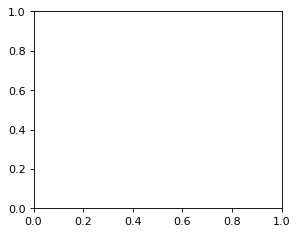

In [10]:
fig = plt.figure(figsize=(4,5), dpi=80)
grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.3)
ax1 = plt.subplot(grid[0:2,0])
#ax2 = plt.subplot(grid[2,0])

pos_save = np.zeros((N_particles,2,len(t)+1))
pos_save[:,:,0] = [i.pos for i in Particle_data]


for i in range(len(t)):
    for j in range(N_particles):
        for k in range(N_particles):
            Particle_data[j].acceleration(Particle_data[k])
        Particle_data[j].update(dt)
        
    pos_save[:,:,i+1] = [z.pos for z in Particle_data]
    
    #if plotRealTime or (i == Nt-1):
     #   plt.sca(ax1)
      #  plt.cla()
      #  xx = pos_save[:,0,max(i-50,0):i+1]
      #  yy = pos_save[:,1,max(i-50,0):i+1]
      #  plt.scatter(xx,yy,s=1,color=[.7,.7,1])
      #  plt.scatter(pos_save[:,:,-1],pos_save[:,:,-1],s=10,color='blue')
      #  ax1.set(xlim=(0, 1), ylim=(0, 1))
      #  ax1.set_aspect('equal', 'box')
      #  ax1.set_xticks([0,1])
      #  ax1.set_yticks([0,1])

        #plt.sca(ax2)
        #plt.cla()
        #plt.scatter(t_all,KE_save,color='red',s=1,label='KE' if i == Nt-1 else "")
        #plt.scatter(t_all,PE_save,color='blue',s=1,label='PE' if i == Nt-1 else "")
        #plt.scatter(t_all,KE_save+PE_save,color='black',s=1,label='Etot' if i == Nt-1 else "")
        #ax2.set(xlim=(0, tEnd), ylim=(-300, 300))
        #ax2.set_aspect(0.007)
        #plt.pause(0.001)

In [11]:

%matplotlib inline
from matplotlib import cm
from matplotlib import animation

In [ ]:
#pos_save[:,:,0]
pos_save.shape

In [ ]:
len(t)

In [ ]:
for i in np.transpose(pos_save):
    pass

In [12]:
fig = plt.figure(figsize = (4,4), dpi=150)
ims = [None for i in range(1000)]
#plt.plot(x_plot,rho_inf_vals,color='r')
for a in range(1000):
    
    im = [plt.scatter(pos_save[:,:,a][:,0],pos_save[:,:,a][:,1],color='b') ]
    
    ims[a] = im
plt.grid()
plt.title("Evolution of SDE dynamics and equilibrium solution, $\gamma$=1")
plt.rcParams["animation.html"]= 'html5'
ani = animation.ArtistAnimation(fig,ims,interval = 100)
plt.close()

In [13]:
ani